### Misc

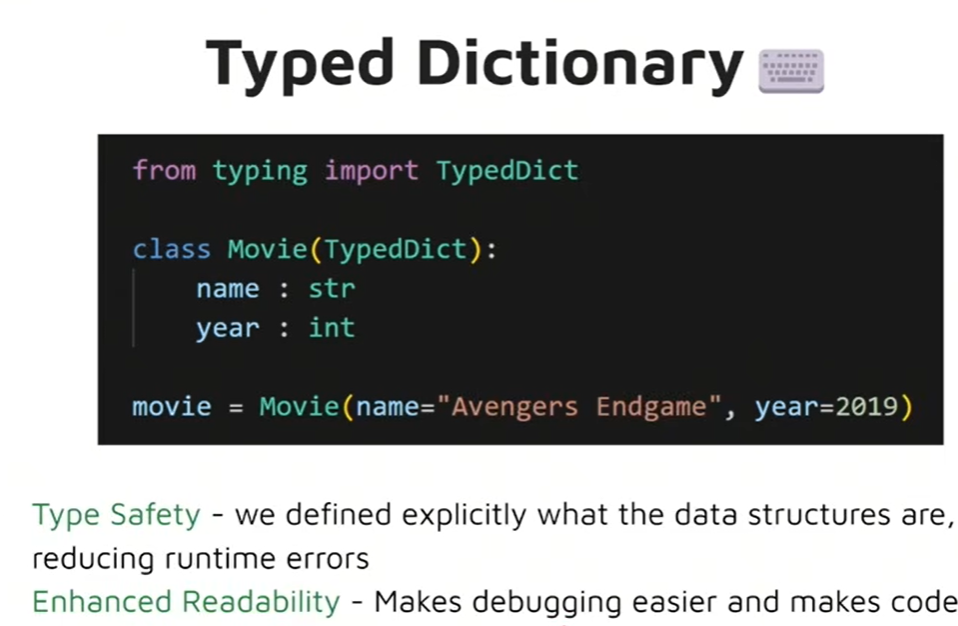

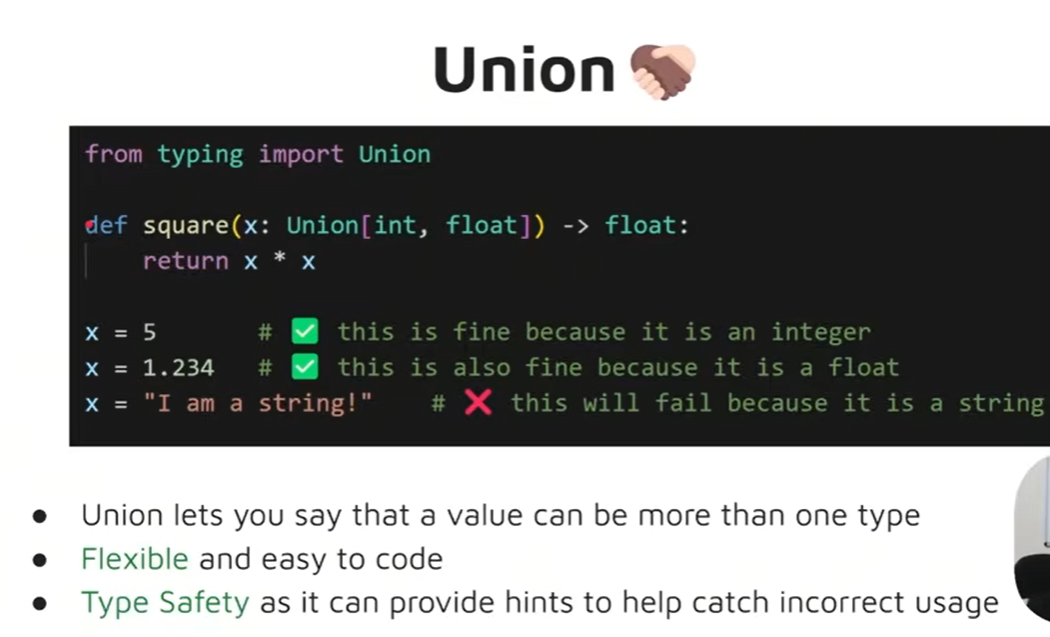

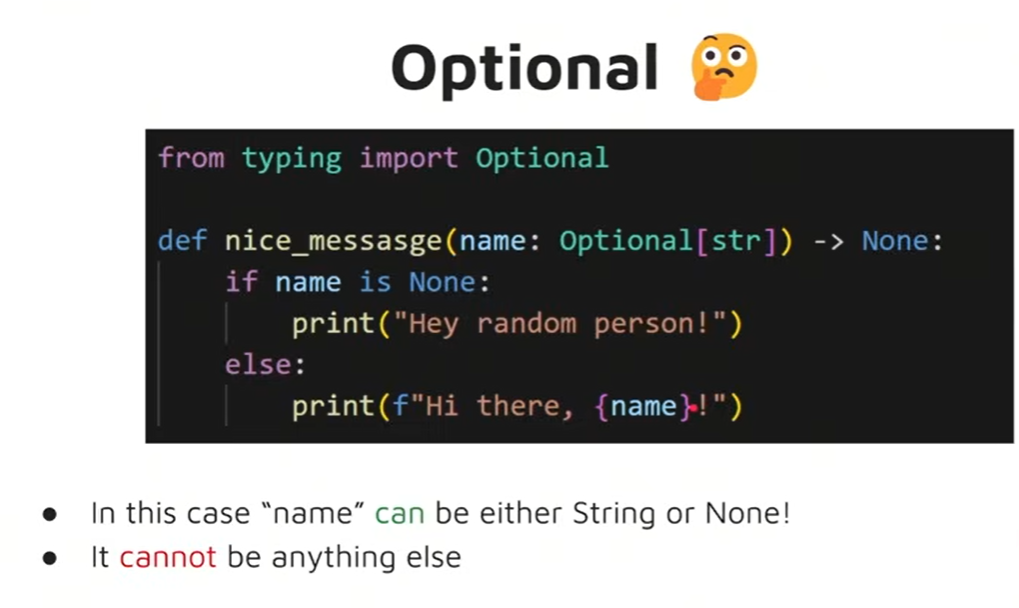

## What is LangGraph?

LangGraph is an orchestration framework for building intelligent, stateful, and multi-step LLM workflows. 

It enables advanced features like parallelism, loops, branching, memory, and resumability - making it ideal for agentic and production-grade AI application.

It models your logic as a graph of nodes (tasks) and edges (routing) instead of a linear chain.

## Different Elements in LangGraph

### LLM Workflows

- LLM Workflows are a step by step process using which we can build complex LLM applications.

- Each step in a workflow performs a specific task - such as prompting, reasoning, tool calling, memory access, or decission making.

- Workflows can be linear, parallel, branched, or looped, allowing for complex behaviours like retries, multi-agent communication, or tool-augmented resoning.

**Prompt Chaining**

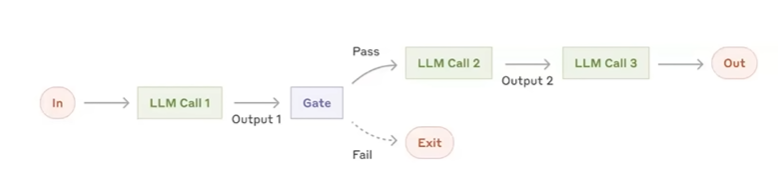

**Router**

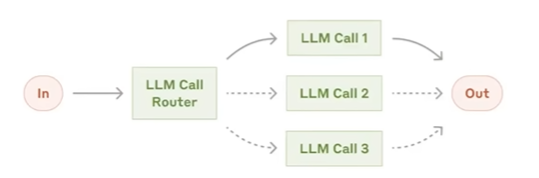

**Parallelization**

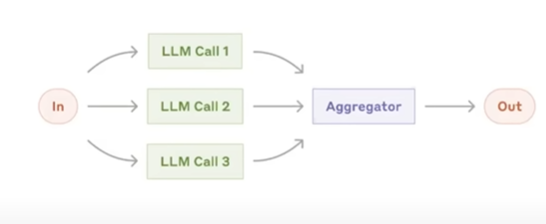

**Orchestrator Workers**

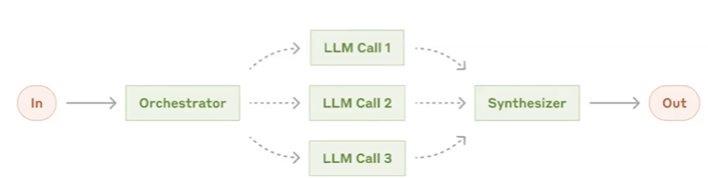


### State
- The **State** is a shared data structure that holds the current information or context of the entire application.
- In simple terms, it is like the application's memory, keeping track of the variables and data that nodes can access and modify as they execute.

**Analogy**
- Think of the State as a large whiteboard in a classroom where all students (nodes) can write and read notes (data) as they work on a project (application). 

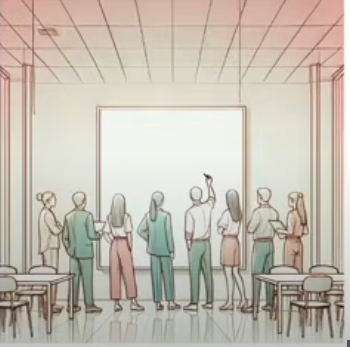

### Nodes

- **Nodes** are individual functions or operations that perform specific tasks within the graph.
- Each nodes receives input (often current state) processes it, and produces an output or an updated state.

**Analogy**:

Imagine a factory with different machines (nodes) that perform specific tasks. Each machine receives raw materials (input) processes them, and produces a product (output).

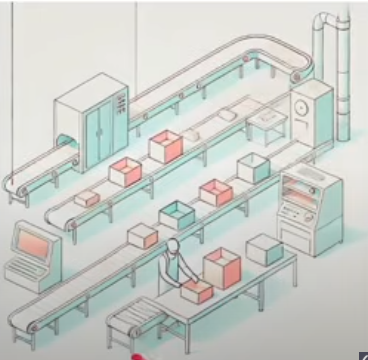





### Graph

- A **Graph** in Langgraph is the overarching structure that maps out how different tasks (nodes) are connected and executed.
- It visually represents the workflow, showing the sequence and conditional paths between various operations.

**Analogy**
- A road map displaying the routes between cities can be seen as a graph, where cities are nodes and roads are edges connecting them.

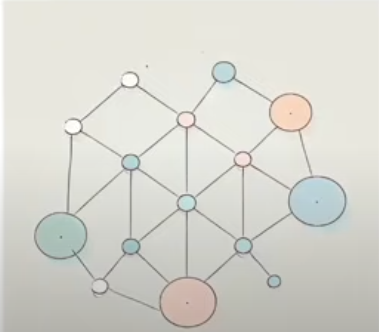


### Edges

- **Edges** are the connections between nodes that determine the flow of execution.
- They tell us which node should be executed next after the current one completes the task.

**Analogy**

Imagine a highway system. Nodes are like cities, and edges are like roads connecting them. Just as a car can only travel on a road to get from one city to another, a program can only execute a task if it has a valid edge (connection) to the next node. Here the car is a state, which gets updated as it travels from one city to another.

### Reducers

Reducers in LangGraph define how updates from nodes are applied to the shared state.

Each key in the state can have its own reducer, which determines whether new data replaces, merges, or adds to existing value.



### Conditional Edges

- **Conditional Edges** are the specialized connections that decide the next node to execute based on specific conditions or logic applied to the current state.

**Analogy**

Traffic Lights: Think of Conditional Edges as traffic lights that change color based on the current traffic conditions. Just as a traffic light can change from red to green based on the traffic flow, a Conditional Edge can change the direction of the flow based on the current state of the system. The condition (light color) decides the next step.

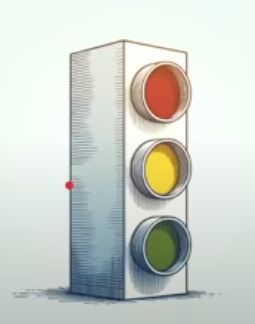



### Start

- The **Start** node is the entry point of the LangGraph, making where the workflow begins.
- It doesn't perform any operations but serves as a starting point for the workflow.

**Analogy**: Race Starting Point



### End

- The **End** node is the last node in the graph. It is the node that the graph is pointing to. 
- Upon reaching this node, the Graph's execution stops, indicating that all intended operations have been performed.

**Analogy**: Finish line of the Race



### Tools

- Tools are specialized functions or utilities that nodes can utilize to perform specific tasks such as fetching data from an API.
- They enhance the capabilities of node by providing additional functionalities.
- Nodes are part of the graph structure, while tools are functionalities used within nodes.

**Analogy**: A hammer for nails, a screwdriver for screws, and a wrench for bolts are all tools used to perform specific tasks. Similarly, in the context of nodes, tools are specialized functions that nodes can use to accomplish particular tasks.

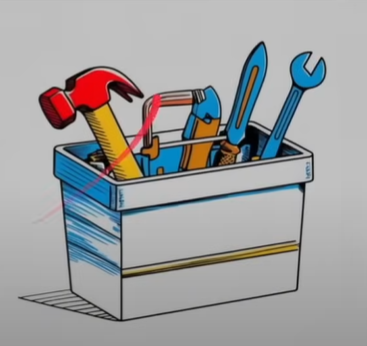

### ToolNode

- A ToolNode is just a special kind of node whose main job is to run a tool.
- It connects the tool's output back into the State, wo other nodes can use that information.


### StateGraph

- A StateGraphn is a class in LangGraph used to build and compile the graph structure.
- It manages the nodes, edges, and overall state, ensuring that the workflow operates in a unified way and that data correctly flows between components.

**Analogy**: Blueprint of a Building

### Messages

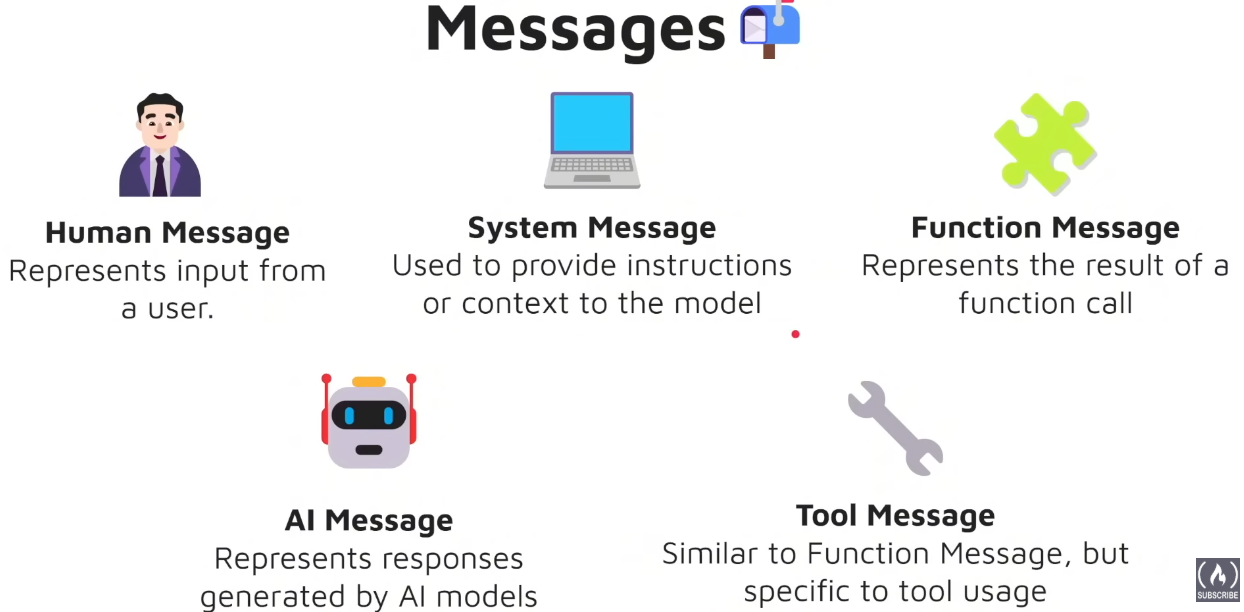

## Hello World Graph

In [5]:
# %pip install --quiet  LangChain, langchain_community, langchain_openai, langgraph

In [7]:
from typing import Dict, TypedDict
# framework that helps you design and manage the flow of tasks in your application using a graph structure
from langgraph.graph import StateGraph


In [15]:
# We now create an AgentState - shared data structure that keeps track of 
# information as your application runs.
class AgentState(TypedDict): # Our state schema
    """State of the agent."""
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """A node that sets the initial greeting message to the state"""
    state['message'] = "Hey "+state['message'] + ", how can I help you today?"
    return state

# We create a StateGraph that defines the flow of tasks in our application.
# The graph consists of nodes (states) and edges (transitions).
graph = StateGraph(AgentState)  # Initialize the graph with our state schema

# Add a node to the graph that sets the initial greeting message
graph.add_node(
    "greeting",
    greeting_node # The function that will be executed in this node
)

graph.set_entry_point("greeting")  # Set the entry point of the graph to the greeting node  
graph.set_finish_point("greeting")  # Set the finish point of the graph to the greeting node

app = graph.compile()  # Compile the graph into an application




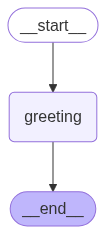

In [16]:
app

In [17]:
result = app.invoke({"message": "John"})  # Invoke the application with a message

In [18]:
result  # Display the result of the invocation

{'message': 'Hey John, how can I help you today?'}